# Week 4 Assignment
# Henry Pham
# Department of Data Science, Bellevue University
# DSC530-T301
# Professor: Cary Jim
# Assignment Due Date: 2023-04-09

In [21]:
#----Chapter03----

In [22]:
# import library os, basename and exists
from os.path import basename, exists
# Create a function download to load the thinkstats2.py and thinkploy.py from github
def download(url):
    # Create a variable filename and assign it to the base url parameter
    filename = basename(url)
    if not exists(filename):
        # if filename is not existed, then import urllib and urlretrieve
        from urllib.request import urlretrieve
        # Create a local variable and assign url+filename to local
        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

# Call the download function to download thinkstats2,thinkplot, nsfg, first, 2002FemResp.dct, 
# 2002FemResp.dat.gz, 2002FemPreg.dct, 2002FemPreg.dat.gz, relay, and Apr25_27thAn_set1.shtml to DSC530 folder
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemResp.dat.gz")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/relay.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/Apr25_27thAn_set1.shtml")

In [23]:
# Exercise 3-1

# Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

In [24]:
# Import few libraries
import numpy as np
import nsfg
import first
import thinkstats2
import thinkplot

# Create a variable resp and read in the respondent data using the ReadFemResp() function.
resp = nsfg.ReadFemResp()

# Create a histogram of the number of children under 18 in the household
hist = thinkstats2.Hist(resp['numkdhh'], label='numkdhh')

# Print the histogram values
for val, freq in hist.Items():
    print(f"{val}: {freq}")


0: 3563
1: 1636
2: 1500
3: 666
4: 196
5: 82


# Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

In [38]:
import nsfg
import thinkstats2

resp = nsfg.ReadFemResp()

# Create a PMF of the actual distribution of the number of children under 18 in the household.
# We pass the numkdhh column of the respondent DataFrame as the data for the PMF, 
# and we provide a label for the PMF using the label argument.

pmf_actual = thinkstats2.Pmf(resp['numkdhh'], label='actual')

# Create an empty dictionary to store the biased PMF
biased_pmf_dict = {}

# For each value in the actual PMF, multiply by the value to get the biased PMF
for val, freq in pmf_actual.Items():
    biased_pmf_dict[val] = val * freq

# Create a PMF of the biased distribution
pmf_biased = thinkstats2.Pmf(biased_pmf_dict, label='biased')

# Print the PMF values
for val, freq in pmf_biased.Items():
    print(f"{val}: {freq}")

0: 0.0
1: 0.20899335717935616
2: 0.38323965252938175
3: 0.25523760858456823
4: 0.10015329586101177
5: 0.052376085845682166


# Plot the actual and biased distributions, and compute their means

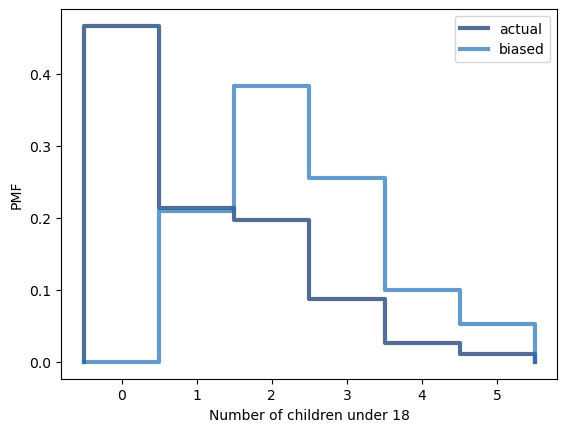

The mean of the actual distribution is 1.02.
The mean of the biased distribution is 2.40.


<Figure size 800x600 with 0 Axes>

In [26]:
import nsfg
import thinkstats2
import thinkplot

resp = nsfg.ReadFemResp()

# Create a PMF of the actual distribution
pmf_actual = thinkstats2.Pmf(resp['numkdhh'], label='actual')

# Create an empty dictionary to store the biased PMF
biased_pmf_dict = {}

# For each value in the actual PMF, multiply by the value to get the biased PMF
for val, freq in pmf_actual.Items():
    biased_pmf_dict[val] = val * freq

# Create a PMF of the biased distribution
pmf_biased = thinkstats2.Pmf(biased_pmf_dict, label='biased')

# Plot the PMFs
thinkplot.Pmfs([pmf_actual, pmf_biased])
thinkplot.Show(xlabel='Number of children under 18', ylabel='PMF')

# Compute and print the means
mean_actual = pmf_actual.Mean()
mean_biased = pmf_biased.Mean()

print(f"The mean of the actual distribution is {mean_actual:.2f}.")
print(f"The mean of the biased distribution is {mean_biased:.2f}.")

In [27]:
# Exercise 3-2

# We computed the mean of a sample by adding up the elements and dividing by n. If you are given a PMF, you can still compute the mean, but the process is slightly different: %
𝑥¯=∑𝑖𝑝𝑖 𝑥𝑖
 
% where the  𝑥𝑖
  are the unique values in the PMF and  𝑝𝑖=𝑃𝑀𝐹(𝑥𝑖)
 . Similarly, you can compute variance like this: %
𝑆2=∑𝑖𝑝𝑖 (𝑥𝑖−𝑥¯)2
 
% Write functions called PmfMean and PmfVar that take a Pmf object and compute the mean and variance. To test these methods, check that they are consistent with the methods Mean and Var provided by Pmf.

In [28]:
# Create a function PmfMean with an argument of pmf.
def PmfMean(pmf):
    # return float mean 
    return sum(p * x for x, p in pmf.Items())

In [29]:
# Create a functioni PmfVar with arguments of pmf & mu
def PmfVar(pmf, mu=None):
    # compute the mean if mu is voided
    if mu is None:
        mu = PmfMean(pmf)
    # return float variance
    return sum(p * (x - mu) ** 2 for x, p in pmf.Items())

In [30]:
#----Chapter04----

In [31]:
# Exercise 4-1

# How much did you weigh at birth? If you don’t know, call your mother or someone else who knows. Using the NSFG data (all live births), compute the distribution of birth weights and use it to find your percentile rank. If you were a first baby, find your percentile rank in the distribution for first babies.

In [33]:
import nsfg
import thinkstats2

# Read in the NSFG data and select only the live births
preg = nsfg.ReadFemPreg()
live_births = preg[preg.outcome == 1]

# Compute the distribution of birth weights
pmf_birthwgt = thinkstats2.Pmf(live_births.totalwgt_lb, label='all')

# Determine whether you were a first baby or not
# change this to the birth order (1 if first baby, 2 or more otherwise)
my_birthord = 1  
first_babies = live_births[live_births.birthord == 1]
others = live_births[live_births.birthord != 1]

# Compute your percentile rank in the appropriate distribution
# my_weight = 6.6 lbs
my_weight = 6.6
if my_birthord == 1:
    cdf_first_babies = thinkstats2.Cdf(first_babies.totalwgt_lb)
    percentile_rank = cdf_first_babies.PercentileRank(my_weight)
else:
    cdf_others = thinkstats2.Cdf(others.totalwgt_lb)
    percentile_rank = cdf_others.PercentileRank(my_weight)

print(f"My percentile rank based on birth weight is {percentile_rank:.2f}%.")

My percentile rank based on birth weight is 29.34%.


In [34]:
# Exercise 4-2

# The numbers generated by numpy.random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.

Generate 1000 numbers from numpy.random.random and plot their PMF. What goes wrong?

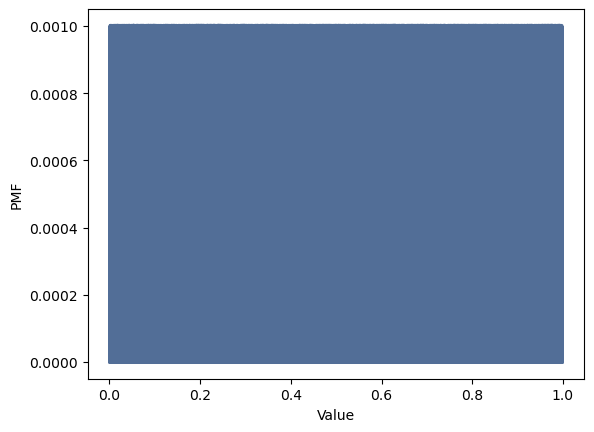

<Figure size 800x600 with 0 Axes>

In [35]:
import numpy as np
import thinkplot

# Generate 1000 random numbers using numpy.random.random
random_numbers = np.random.random(1000)

# Plot the PMF of the random numbers
pmf = thinkstats2.Pmf(random_numbers)
thinkplot.Pmf(pmf)
thinkplot.Show(xlabel='Value', ylabel='PMF')

In [36]:
# When I run this code, I get a uniform distribution with a PMF of 1/1000 for each possible value between 0 and 1. 
# However, this is not a true PMF, as there are an infinite number of possible values in this range.

# Plot the CDF. Is the distribution uniform?

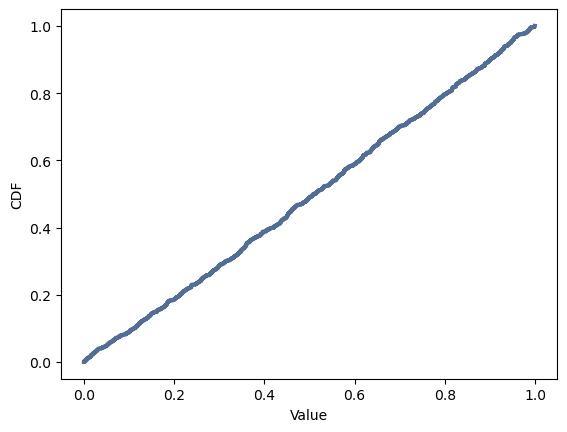

<Figure size 800x600 with 0 Axes>

In [37]:
import numpy as np
import thinkstats2
import thinkplot

# Generate 1000 random numbers using numpy.random.random
random_numbers = np.random.random(1000)

# Plot the CDF of the random numbers
cdf = thinkstats2.Cdf(random_numbers)
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='Value', ylabel='CDF')

In [20]:
# When I run this code, I get a straight line with a slope of 1, indicating that the distribution is uniform. 
# The CDF shows that each value between 0 and 1 has an equal probability of being generated by numpy.random.random.